In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # I might use this for some plots
import matplotlib.pyplot as plt # another option for plots
from sklearn.model_selection import train_test_split

In [45]:
train = pd.read_csv('data/titanic_raw_train.csv')
holdout = pd.read_csv('data/titanic_raw_test.csv')

In [46]:
train = train.drop(['PassengerId', 'Name', 'Cabin', 'Age', 'Ticket'], axis = 1) # Drop the useless features:
train['Embarked'] = train['Embarked'].ffill() # Forward-fill Embarked
train['Sex'] = train['Sex'].replace(['male', 'female'], [0,1]) # Convert male/female to 0/1

# Do the same things to the holdout dataset

holdout = holdout.drop(['Name', 'Cabin', 'Age', 'Ticket'], axis = 1)
holdout['Embarked'] = holdout['Embarked'].ffill()
holdout['Sex'] = holdout['Sex'].replace(['male', 'female'], [0,1])
holdout = holdout.dropna()
holdout_ids = holdout['PassengerId']
holdout = holdout.drop(['PassengerId'], axis = 1)

In [47]:
# Now to one-hot-encode the embarkation 

dummies = pd.get_dummies(train['Embarked'])
train = train.join(dummies)
train = train.drop(['Embarked'], axis = 1)


# and to the holdout dataset:

holdout_dummies = pd.get_dummies(holdout['Embarked'])
holdout = holdout.join(dummies)
holdout = holdout.drop(['Embarked'], axis = 1)

,Pclass,Sex,SibSp,Parch,Fare,C,Q,S
0,3,0,0,0,7.8292,False,False,True
1,3,1,1,0,7.0000,True,False,False
2,2,0,0,0,9.6875,False,False,True
3,3,0,0,0,8.6625,False,False,True
4,3,1,1,1,12.2875,False,False,True


In [48]:
# Now to normalise Fare

train_fare_max = train['Fare'].max()
train_fare_min = train['Fare'].min()

holdout_fare_max = holdout['Fare'].max()
holdout_fare_min = holdout['Fare'].min()



#They share the same max (512.3292) and min (0)

train['Fare'] = train['Fare'] / train_fare_max # normalise fare
train['Pclass'] = train['Pclass'] / 3          # normalise class
train['Parch'] = train['Parch'] / 6            # normalise family count
    
holdout['Fare'] = holdout['Fare'] / train_fare_max
holdout['Pclass'] = holdout['Pclass'] / 3 
holdout['Parch'] = holdout['Parch'] / 6

,Pclass,Sex,SibSp,Parch,Fare,C,Q,S
0,1.000000,0,0,0.000000,0.015282,False,False,True
1,1.000000,1,1,0.000000,0.013663,True,False,False
2,0.666667,0,0,0.000000,0.018909,False,False,True
3,1.000000,0,0,0.000000,0.016908,False,False,True
4,1.000000,1,1,0.166667,0.023984,False,False,True


In [49]:
predictors = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S']
target = ['Survived']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(train[predictors], train[target], train_size = 0.8, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(y_test)

(712, 8)
(179, 8)
(712, 1)
(179, 1)
     Survived
709         1
439         0
840         0
720         1
39          1
..        ...
433         0
773         0
25          1
84          1
10          1

[179 rows x 1 columns]


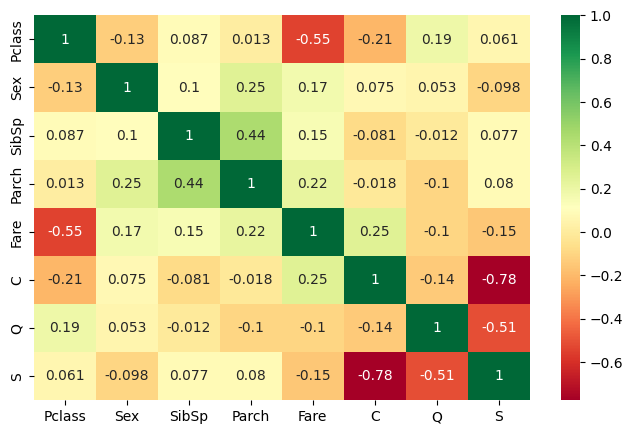

In [51]:
plt.subplots(figsize=(8, 5))
sns.heatmap(X_train.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]
# print(y_pred.shape)
# print(y_pred_proba)

print('Accuracy score on testing data is: '+ str(accuracy_score(y_test, y_pred)))
print('Precision score on testing data is: '+ str(precision_score(y_test, y_pred)))

Accuracy score is: 0.776536312849162
Precision score is: 0.7428571428571429


/home/keenanandrew/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
